In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [2]:
# Define useful functions
from numpy.polynomial.chebyshev import cheb2poly
from scipy.linalg import eigvals

# Add parent directory to be able to import from analysis
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir)))

from analysis.methods.chebyshev import _coef_tensor
from seemps.cross import Mesh, RegularHalfOpenInterval

def compute_chebyshev_coefficients(func, orders, a=-1, b=1):
    interval = RegularHalfOpenInterval(a, b, 1)
    mesh = Mesh([interval])
    coeffs = _coef_tensor(func, mesh, orders)
    return coeffs

def convert_to_standard_form(coeffs):
    return cheb2poly(coeffs)

def find_roots_from_monomials(coeffs):
    companion_matrix = np.diag(np.ones(len(coeffs)-2), -1)
    companion_matrix[:, -1] = -np.array(coeffs[:-1]/coeffs[-1])
    return eigvals(companion_matrix)

def find_roots_from_cheb(coeffs):
    companion = np.polynomial.chebyshev.chebcompanion(coeffs)
    return eigvals(companion)

def create_factorized_polynomial(roots):
    x = sp.symbols('x')
    monomials = [x - root for root in roots]
    return sp.prod(monomials)

In [26]:
f = lambda x: np.exp(x)
coeffs = compute_chebyshev_coefficients(f, [5])
print(coeffs)
standard_coeffs = convert_to_standard_form(coeffs)
print(standard_coeffs)
#roots = find_roots_from_monomials(standard_coeffs)
roots = find_roots_from_cheb(coeffs)
print(roots)
poly_expr = create_factorized_polynomial(roots) * standard_coeffs[-1]
print(poly_expr)

# Create a lambda function for polynomial expression
x, y = sp.symbols('x y')
linear_combination = x + y
substituted_expr = poly_expr.subs(x, linear_combination)
print(substituted_expr)
poly_func = sp.lambdify(x, poly_expr, 'numpy')
subs_func = sp.lambdify((x, y), substituted_expr, 'numpy')


[ 2.77555756e-17  8.80101161e-01  1.66533454e-16 -3.91237033e-02
  4.16333634e-17]
[-9.71445147e-17  9.97472271e-01  0.00000000e+00 -1.56494813e-01
  3.33066907e-16]
[-2.52464571e+00+0.j  2.67841305e-15+0.j  2.52464571e+00+0.j
  4.69859988e+14+0.j]
3.33066907387547e-16*(x - 469859988440308.0)*(x - 2.52464571318263)*(x - 2.67841304690819e-15)*(x + 2.52464571318262)
3.33066907387547e-16*(x + y - 469859988440308.0)*(x + y - 2.52464571318263)*(x + y - 2.67841304690819e-15)*(x + y + 2.52464571318262)


/home/jjrodriguezaldavero/miniforge3/envs/quinfog/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


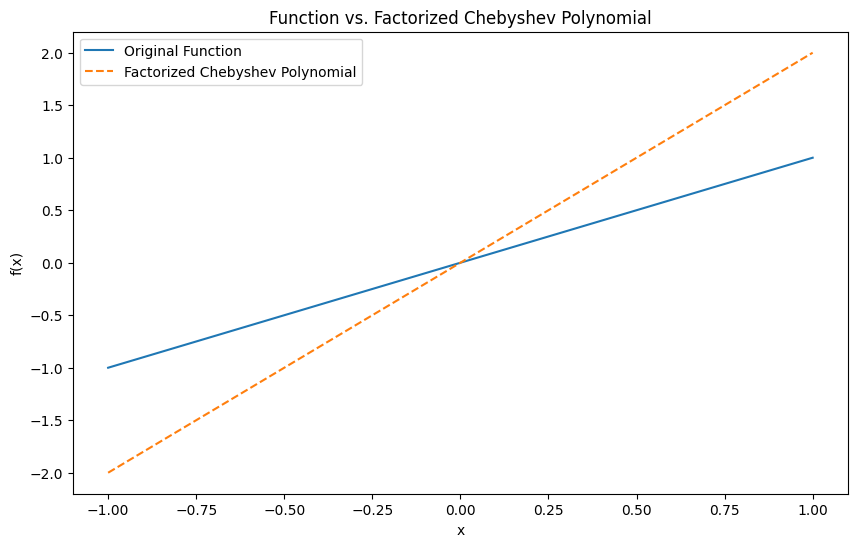

In [16]:
# Evaluate the functions
x_vals = np.linspace(-1, 1, 400)
f_vals = f(x_vals)
poly_vals = poly_func(x_vals)
subs_vals = subs_func(x_vals, x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, f_vals, label='Original Function')
plt.plot(x_vals, subs_vals, label='Factorized Chebyshev Polynomial', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Function vs. Factorized Chebyshev Polynomial')
plt.legend()
plt.show()

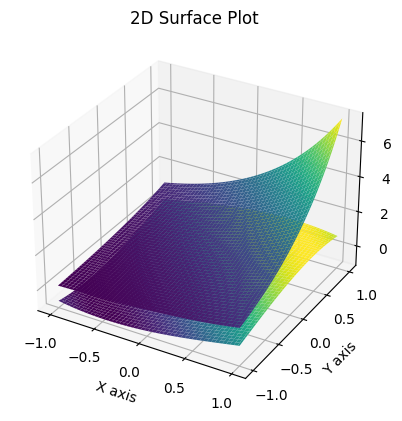

In [32]:
f_two = lambda x, y: np.exp(x+y)
# Create a grid of x and y values
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
x, y = np.meshgrid(x, y)

# Calculate corresponding z values
z1 = f_two(x, y)
z2 = subs_func(x,y)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surface = ax.plot_surface(x, y, z1, cmap='viridis')
surface = ax.plot_surface(x, y, z2, cmap='viridis')

# Add labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('2D Surface Plot')

# Show the plot
plt.show()